<a href="https://colab.research.google.com/github/AdhithJCB/bdmc-demo/blob/main/notebooks/01_biomolecular_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip -q install biopython py3Dmol

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 31.5 MB/s eta 0:00:00


In [11]:
import urllib.request

pdb_id = "1ubq"
url = f"https://files.rcsb.org/download/{pdb_id.upper()}.pdb"
out = f"{pdb_id}.pdb"

urllib.request.urlretrieve(url, out)
print("Downloaded:", out)


Downloaded: 1ubq.pdb


In [12]:
from Bio.PDB import PDBParser

parser = PDBParser(QUIET=True)
structure = parser.get_structure("ubq", "1ubq.pdb")

model = next(structure.get_models())
chains = list(model.get_chains())

print("Chains:", [c.id for c in chains])
for c in chains:
    residues = [r for r in c.get_residues() if r.id[0] == " "]
    print(f"Chain {c.id}: {len(residues)} residues")

Chains: ['A']
Chain A: 76 residues


In [20]:
import numpy as np

chain = chains[0]
residues = [r for r in chain.get_residues() if r.id[0] == " " and "CA" in r]

coords = np.array([r["CA"].get_coord() for r in residues])
res_ids = [r.id[1] for r in residues]  #residue numbers

#Pick a residue index to analyze (interactive portion)
i = 75  #change here!
ref = coords[i]
dists = np.linalg.norm(coords - ref, axis=1)

#show closest residues
order = np.argsort(dists)
closest = [(res_ids[j], float(dists[j])) for j in order[1:11]]
closest


[(75, 3.7942745685577393),
 (74, 7.071465492248535),
 (73, 7.792910575866699),
 (72, 10.422935485839844),
 (71, 12.926973342895508),
 (40, 13.359792709350586),
 (39, 15.646744728088379),
 (70, 15.858918190002441),
 (41, 16.345243453979492),
 (37, 17.006649017333984)]

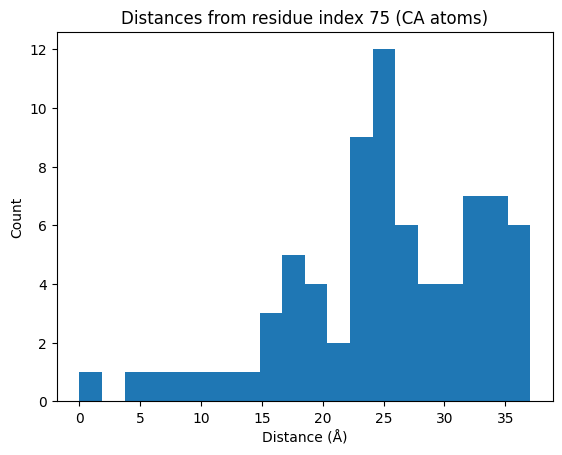

In [21]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(dists, bins=20)
plt.title(f"Distances from residue index {i} (CA atoms)")
plt.xlabel("Distance (Å)")
plt.ylabel("Count")
plt.show()

In [22]:
import py3Dmol

view = py3Dmol.view(query='pdb:1ubq')
view.setStyle({'cartoon': {'color':'spectrum'}})

#highlight the selected residue in red
sel_resnum = res_ids[i]
view.setStyle({'resi': str(sel_resnum)}, {'stick': {'color': 'red'}})

view.zoomTo()
view.show()


3Dmol.js failed to load for some reason. Please check your browser console for error messages.